<a href="https://www.kaggle.com/code/mltheaiengineer/nlp-analysis-michael-lorenz-digital-footprint?scriptVersionId=234522787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

--- Setting up Libraries ---
Libraries imported.

--- Locating Input TXT File ---
Looking inside directory: /kaggle/input/profilanalyse-michael-lorenz-digitaler-fuabdruck/
Success: Found exactly one TXT file: 'Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt'.
Using automatically determined file path: '/kaggle/input/profilanalyse-michael-lorenz-digitaler-fuabdruck/Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt'
--------------------------------------------------

--- Setting up Language Model and Stopwords ---
spaCy model 'de_core_news_sm' not found. Attempting download...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 64.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' o

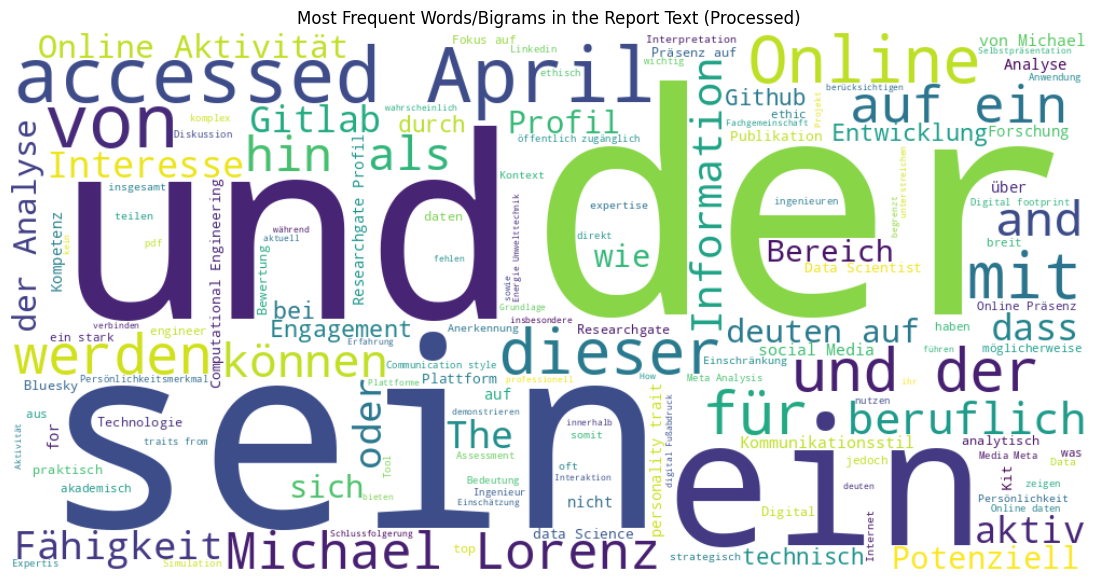


--- Named Entity Recognition (NER) ---
Performing NER on text of length 44408...
NER processing complete. Found 369 entities.

Most Common Entity Types Detected:
| Type   |   count |
|:-------|--------:|
| MISC   |     145 |
| ORG    |      81 |
| PER    |      77 |
| LOC    |      66 |

Most Common ORG & PER Entities Detected (Sample):
| Entity                          |   count |
|:--------------------------------|--------:|
| Michael Lorenz                  |      24 |
| ResearchGate                    |       8 |
| KIT                             |       8 |
| Data Scientists                 |       4 |
| ArtificialAnalysis              |       4 |
| Bluesky                         |       3 |
| HPC                             |       3 |
| Online-Profile                  |       3 |
| Machine Learning                |       3 |
| KI                              |       3 |
| Digital Twins                   |       2 |
| MIR KI                          |       2 |
| Persönlichkeit

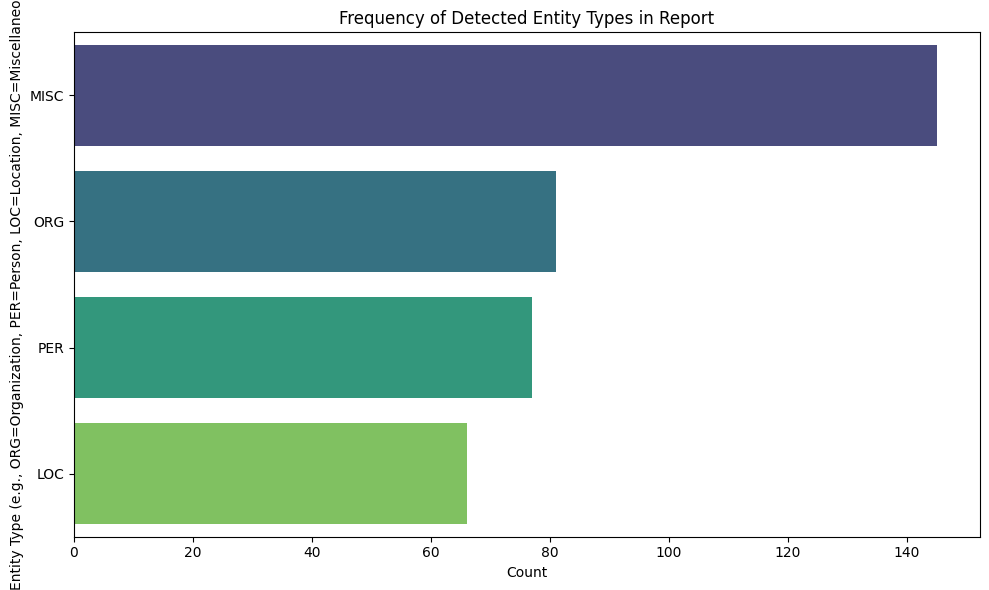


--- Keyword Extraction (TF-IDF) ---
Top 30 Keywords/Keyphrases based on TF-IDF Score:
| Keyword        |   TF-IDF Score |
|:---------------|---------------:|
| der            |      0.606808  |
| und            |      0.404538  |
| sein           |      0.344922  |
| ein            |      0.210786  |
| von            |      0.157557  |
| auf            |      0.155428  |
| online         |      0.15117   |
| accessed       |      0.132007  |
| april          |      0.127749  |
| accessed april |      0.127749  |
| mit            |      0.085166  |
| dieser         |      0.0830368 |
| und der        |      0.0745202 |
| für            |      0.0745202 |
| werden         |      0.0638745 |
| lorenz         |      0.0617453 |
| digital        |      0.0596162 |
| data           |      0.057487  |
| michael        |      0.057487  |
| hin            |      0.057487  |
| auf ein        |      0.0553579 |
| analyse        |      0.0553579 |
| michael lorenz |      0.0553579 |
| profil     

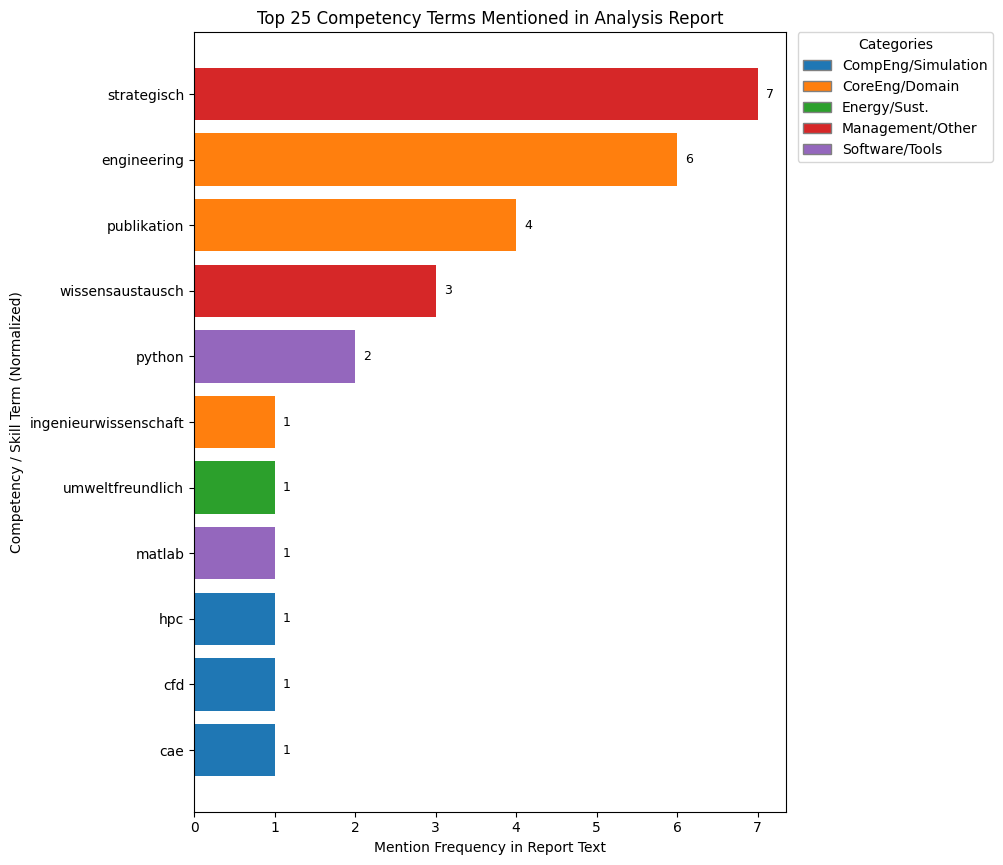


--- Notebook Execution Finished ---


In [1]:
# -*- coding: utf-8 -*-
# Kaggle Notebook: NLP Analysis and Competency Extraction from Michael Lorenz's Digital Footprint Report

# --- 0. Setup and Imports ---
print("--- Setting up Libraries ---")
import os
import pandas as pd
import nltk
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.patches import Patch # For custom legends

# Ignore common warnings to keep output clean
warnings.filterwarnings("ignore")
print("Libraries imported.")

# --- 1. Configuration & Robust File Path Finding ---
# Description: Attempts to locate the primary TXT data file within the expected Kaggle input directory.
# Keywords: Kaggle, file path, input data, dataset loading, error handling

print("\n--- Locating Input TXT File ---")
# !!! IMPORTANT: Double-check this slug matches your dataset's URL slug on Kaggle !!!
dataset_slug = 'profilanalyse-michael-lorenz-digitaler-fuabdruck'
dataset_dir = f'/kaggle/input/{dataset_slug}/'
print(f"Looking inside directory: {dataset_dir}")

found_txt_file = None
file_path = None # Initialize file_path

try:
    items_in_dir = os.listdir(dataset_dir)
    txt_files = [f for f in items_in_dir if f.lower().endswith('.txt')]

    if len(txt_files) == 1:
        # Case 1: Exactly one TXT file found - use it automatically
        found_txt_file = txt_files[0]
        file_path = os.path.join(dataset_dir, found_txt_file)
        print(f"Success: Found exactly one TXT file: '{found_txt_file}'.")
        print(f"Using automatically determined file path: '{file_path}'")
    elif len(txt_files) > 1:
        # Case 2: Multiple TXT files found - require manual intervention
        print(f"WARNING: Found multiple TXT files in {dataset_dir}:")
        for f in txt_files: print(f"  - '{f}'")
        print(">>> Please specify the correct filename manually in the 'file_path' variable definition below! <<<")
        # Set file_path to None to force manual correction later
        file_path = None
    else:
        # Case 3: No TXT files found
        print(f"WARNING: No TXT files found in '{dataset_dir}'.")
        if items_in_dir:
            print("Other files/folders found:")
            for item in items_in_dir: print(f"  - '{item}'") # List PDF etc.
        else: print("The directory seems to be empty.")
        print(">>> Please check if the TXT file was uploaded correctly to the current dataset version. <<<")
        print(">>> You will need to set the 'file_path' variable manually below. <<<")
        # Set file_path to None to force manual correction later
        file_path = None

except FileNotFoundError:
    # Case 4: Dataset directory itself not found
    print(f"\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"ERROR: The dataset directory '{dataset_dir}' was NOT found.")
    print(f"Possible issues:")
    print(f"  1. The dataset slug ('{dataset_slug}') might be incorrect. Check your dataset URL on Kaggle.")
    print(f"  2. The dataset might not be correctly attached/loaded into this notebook session. Check the 'Input' sidebar.")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    # Check base input directory for clues
    print(f"\n--- Checking contents of base input directory: /kaggle/input/ ---")
    try:
        base_items = os.listdir('/kaggle/input/')
        if base_items:
            print("Datasets/Folders found in /kaggle/input/:")
            for item in base_items: print(f"  - '{item}'") # This might show the correct dataset slug
        else: print("The base directory /kaggle/input/ is empty.")
    except Exception as e_base: print(f"Could not list contents of /kaggle/input/: {e_base}")
    # Set file_path to None to force manual correction later
    file_path = None
except Exception as e:
    print(f"\nAn unexpected error occurred while listing directory contents: {e}")
    # Set file_path to None to force manual correction later
    file_path = None


# --- MANUAL FALLBACK PATH DEFINITION ---
# Description: Define the file path manually if automatic detection failed or needs override.
# Keywords: file path, manual configuration, debugging

if file_path is None:
    # !!! MANUAL DEFINITION REQUIRED IF AUTOMATIC DETECTION FAILED !!!
    print("\n>>> Automatic file detection failed or needs confirmation. Defining path manually. <<<")
    print(">>> !!! PLEASE VERIFY AND CORRECT THE PATH AND FILENAME BELOW MANUALLY !!! <<<")
    # Example: Use the name identified in the debug output, e.g. if 'ß' became 'ss'
    manual_filename = 'Profilanalyse_Michael_Lorenz_digitaler_Fuabdruck.txt' # Check this carefully!
    file_path = os.path.join(dataset_dir, manual_filename)
    print(f"Manual fallback path set to: '{file_path}'")
    print(">>> Ensure this path is correct before proceeding! <<<")

print("-" * 50)


# --- 2. Language Model and Stopwords Setup ---
# Description: Load German spaCy model and NLTK stopwords for text processing.
# Keywords: spaCy, NLP, German language model, NLTK, stopwords, text processing setup

print("\n--- Setting up Language Model and Stopwords ---")
nlp = None # Initialize nlp model variable
try:
    nlp = spacy.load("de_core_news_sm")
    print("spaCy model 'de_core_news_sm' loaded successfully.")
except OSError:
    print("spaCy model 'de_core_news_sm' not found. Attempting download...")
    try:
        spacy.cli.download("de_core_news_sm")
        nlp = spacy.load("de_core_news_sm")
        print("spaCy model 'de_core_news_sm' downloaded and loaded successfully.")
        print("Recommendation: You might need to restart the Kernel/Runtime now for the model to be fully available.")
    except Exception as e:
        print(f"ERROR: Failed to download or load spaCy model: {e}")

german_stop_words = [] # Initialize stopwords list
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK stopwords not found. Downloading...")
    try: nltk.download('stopwords', quiet=True); print("NLTK stopwords downloaded.")
    except Exception as e: print(f"Error downloading NLTK stopwords: {e}")
try:
    german_stop_words_base = stopwords.words('german')
    # Define custom stopwords relevant to this specific report analysis
    custom_stops = ['michael', 'lorenz', 'bericht', 'analyse', 'herr', 'm.sc.', 'kit', 'pdf', 'datei', 'hin', 'deuten',
                    'sowie', 'dabei', 'insgesamt', 'jedoch', 'bereits', 'deutet', 'zeigt', 'könnte', 'lässt', 'schließen',
                    'hervorgehoben', 'genannt', 'gibt', 'können', 'bereits', 'hinaus', 'somit', 'deutlicht', 'allerdings',
                    'grundlage', 'bereich', 'profil', 'thema', 'themen', 'kompetenzen', 'fähigkeiten', 'interesse', 'interessen',
                    'rahmen', 'online', 'daten', 'person', 'profil', 'abgeleiteten', 'basierend', 'etwa', 'lässt', 'einer',
                    'schließen', 'deutlic', 'ab', 'sei', 'deutschen', 'beispielsweise', 'weitere', 'lässt schließen',
                    'hinsicht', 'zudem', 'innerhalb', 'solcher', 'bereich', 'nutzung', 'einsatz', 'methode', 'aspekt']
    german_stop_words = list(set(german_stop_words_base + custom_stops))
    print(f"Loaded and customized {len(german_stop_words)} German stopwords.")
except Exception as e:
    print(f"ERROR: Could not load or customize German stopwords: {e}")

# --- 3. Data Loading and Preprocessing Function Definition ---
# Description: Define function for cleaning and preparing the report text for NLP analysis.
# Keywords: text preprocessing, data cleaning, NLP function, lemmatization, regex

print("\n--- Defining Preprocessing Function ---")
def preprocess_text(text, use_lemma=True):
    """Cleans and preprocesses the input text using spaCy for lemmatization (optional)."""
    if not text or not nlp: return "" # Return empty if no text or no model
    # Remove metadata and formatting artifacts
    text = re.sub(r'\[source: \d+\]', '', text, flags=re.IGNORECASE)
    text = re.sub(r'--- PAGE \d+ ---', '', text, flags=re.IGNORECASE)
    text = re.sub(r'the following table:', '', text, flags=re.IGNORECASE)
    text = text.replace('•', '')
    # Basic cleaning
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'[^\w\s]', ' ', text) # Keep only word chars and whitespace
    text = re.sub(r'\d+', ' ', text)    # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Consolidate whitespace

    # Process with spaCy NLP pipeline
    doc = nlp(text)
    # Extract tokens based on options
    if use_lemma:
        # Use lemma, filter stopwords, keep only alpha chars, min length 3
        tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in german_stop_words and len(token.lemma_) > 2]
    else:
        # Use original text, filter stopwords, keep only alpha chars, min length 3
        tokens = [token.text for token in doc if token.is_alpha and token.text not in german_stop_words and len(token.text) > 2]
    return ' '.join(tokens)

print("Preprocessing function defined.")

# --- 4. Load and Process the Main Data ---
# Description: Load the text from the located file and apply preprocessing.
# Keywords: data loading, text file, preprocessing execution, NLP pipeline

print("\n--- Loading and Preprocessing Main Text ---")
report_text = ""
processed_text = ""
if file_path and os.path.exists(file_path): # Check if path is defined and file exists
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            report_text = f.read()
        print(f"Successfully loaded text file: '{file_path}'. Length: {len(report_text)} characters.")

        if report_text and nlp:
            print("Preprocessing text (this may take a moment)...")
            processed_text = preprocess_text(report_text, use_lemma=True)
            if processed_text:
                print(f"Preprocessing complete. Processed text length: {len(processed_text)} characters.")
                print(f"Example snippet: '{processed_text[:250]}...'")
            else:
                print("WARNING: Preprocessing resulted in empty text. Check input and stopword list.")
        elif not nlp:
             print("ERROR: Cannot preprocess text because spaCy model failed to load earlier.")
        else:
             print("WARNING: Input text file seems empty.")

    except FileNotFoundError: # Should ideally not happen if path finding worked, but as safeguard
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print(f"ERROR: File not found at the confirmed path: '{file_path}'")
        print(f"This is unexpected. Please re-check file existence and path in Kaggle 'Input'.")
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    except Exception as e:
        print(f"An error occurred while loading or processing the file: {e}")
else:
    print(f"ERROR: Skipping Data Loading and Processing because the file path '{file_path}' is invalid or the file does not exist.")
    print(f"Please check the output of the 'Locating Input TXT File' section and correct the 'file_path' definition if necessary.")

# --- 5. EDA: Word Cloud Visualization ---
# Description: Generate a word cloud visualization of the most frequent terms in the processed report text.
# Keywords: Exploratory Data Analysis, EDA, Word Cloud, text visualization, term frequency

# Run only if processed_text is available and non-empty
if processed_text:
    print("\n--- Basic Text Analysis & Word Cloud ---")
    if len(processed_text.split()) > 5: # Check if there are enough words
        try:
            wordcloud = WordCloud(width=1000, height=500, background_color='white',
                                  stopwords=german_stop_words, max_words=150, collocations=True).generate(processed_text)
            plt.figure(figsize=(15, 7))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('Most Frequent Words/Bigrams in the Report Text (Processed)')
            plt.show()
        except ValueError as ve: print(f"Could not generate word cloud: {ve}. Check processed text.")
        except Exception as e: print(f"Could not generate word cloud: {e}")
    else:
        print("Skipping Word Cloud generation as processed text is too short.")
else:
    print("\nSkipping Word Cloud generation as processed text is not available.")

# --- 6. Named Entity Recognition (NER) ---
# Description: Identify and categorize named entities (Persons, Organizations, Locations etc.) within the report text using spaCy.
# Keywords: Named Entity Recognition, NER, spaCy, information extraction, entity analysis, ORG, PER, LOC

# Run only if report_text and nlp are available
if report_text and nlp:
    print("\n--- Named Entity Recognition (NER) ---")
    # Use less processed text for NER to keep context, but remove boilerplate
    ner_text = re.sub(r'--- PAGE \d+ ---', '', report_text, flags=re.IGNORECASE)
    ner_text = re.sub(r'\[source: \d+\]', '', ner_text, flags=re.IGNORECASE)
    ner_text = re.sub(r'\s+', ' ', ner_text).strip()

    # Adjust spaCy's max_length dynamically
    nlp.max_length = len(ner_text) + 100

    try:
        print(f"Performing NER on text of length {len(ner_text)}...")
        doc_ner = nlp(ner_text)
        entities = [(ent.text.strip(), ent.label_) for ent in doc_ner.ents if len(ent.text.strip()) > 1]

        if entities:
            df_entities = pd.DataFrame(entities, columns=['Entity', 'Type'])
            print(f"NER processing complete. Found {len(df_entities)} entities.")

            # --- NER Analysis & Visualization ---
            print("\nMost Common Entity Types Detected:")
            print(df_entities['Type'].value_counts().head(10).to_markdown())

            print("\nMost Common ORG & PER Entities Detected (Sample):")
            print(df_entities[df_entities['Type'].isin(['ORG', 'PER'])]['Entity'].value_counts().head(20).to_markdown())

            print("\nMost Common MISC & LOC Entities Detected (Sample):")
            # Filter out very short MISC terms that might be noise
            df_misc_loc = df_entities[df_entities['Type'].isin(['MISC', 'LOC'])]
            df_misc_loc = df_misc_loc[df_misc_loc['Entity'].str.len() > 2]
            print(df_misc_loc['Entity'].value_counts().head(20).to_markdown())

            # Visualization of Entity Types
            if not df_entities.empty:
                plt.figure(figsize=(10, max(6, len(df_entities['Type'].unique())*0.5)))
                sns.countplot(y='Type', data=df_entities, order=df_entities['Type'].value_counts().index, palette='viridis')
                plt.title('Frequency of Detected Entity Types in Report')
                plt.xlabel('Count')
                plt.ylabel('Entity Type (e.g., ORG=Organization, PER=Person, LOC=Location, MISC=Miscellaneous)')
                plt.tight_layout()
                plt.show()
        else:
            print("No named entities found by spaCy NER.")
    except ValueError as ve: print(f"An error occurred during NER (possibly text length related): {ve}")
    except Exception as e: print(f"An unexpected error occurred during NER: {e}")
else:
    print("\nSkipping NER due to lack of input text or spaCy model.")

# --- 7. Keyword / Keyphrase Extraction (TF-IDF) ---
# Description: Extract significant keywords and phrases from the report using TF-IDF scores to understand term importance.
# Keywords: Keyword Extraction, TF-IDF, text mining, term frequency, keyphrase analysis, feature extraction

# Run only if processed_text is available
if processed_text:
    print("\n--- Keyword Extraction (TF-IDF) ---")
    if len(processed_text.split()) > 10:
        try:
            tfidf_vectorizer = TfidfVectorizer(stop_words=german_stop_words, max_features=5000, ngram_range=(1,2)) # Use uni- and bi-grams
            tfidf_matrix = tfidf_vectorizer.fit_transform([processed_text])
            feature_names = tfidf_vectorizer.get_feature_names_out()
            scores = tfidf_matrix.toarray().flatten()
            df_keywords = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': scores}).sort_values(by='TF-IDF Score', ascending=False)

            print("Top 30 Keywords/Keyphrases based on TF-IDF Score:")
            print(df_keywords.head(30).to_markdown(index=False))
        except ValueError as ve: print(f"Could not perform TF-IDF: {ve}. Vocabulary might be empty after stopword removal.")
        except Exception as e: print(f"Could not perform TF-IDF: {e}")
    else: print("Skipping TF-IDF as processed text is too short.")
else:
    print("\nSkipping Keyword Extraction due to lack of processed text.")

# --- 8. Topic Modeling (LDA) ---
# Description: Apply Latent Dirichlet Allocation (LDA), a machine learning algorithm, to identify latent topics within the report text.
# Keywords: Topic Modeling, LDA, Latent Dirichlet Allocation, Machine Learning, unsupervised learning, text clustering, theme detection

# Run only if report_text and nlp are available
if report_text and nlp:
    print("\n--- Topic Modeling (LDA) ---")
    # Split into paragraphs for better LDA results
    paragraphs = [p.strip() for p in re.split(r'\n\s*\n', report_text) if len(p.strip()) > 200] # Min length filter
    print(f"Splitting report into {len(paragraphs)} paragraphs (min length 200 chars) for Topic Modeling.")

    if len(paragraphs) >= 5: # Need a minimum number of documents for LDA
        print("Preprocessing paragraphs for LDA...")
        processed_paragraphs = [preprocess_text(p, use_lemma=True) for p in paragraphs]
        processed_paragraphs = [p for p in processed_paragraphs if len(p.split()) > 15] # Filter paragraphs that become too short after processing
        print(f"Using {len(processed_paragraphs)} non-empty processed paragraphs for LDA.")

        if len(processed_paragraphs) >= 5:
            try:
                # Vectorize paragraphs using word counts
                count_vectorizer_lda = CountVectorizer(stop_words=german_stop_words, max_df=0.90, min_df=2) # Adjust params as needed
                lda_matrix = count_vectorizer_lda.fit_transform(processed_paragraphs)

                if lda_matrix.shape[1] > 5: # Check if vocabulary is sufficient
                    n_topics = 6 # Define number of topics to find (can be tuned)
                    print(f"Fitting LDA model for {n_topics} topics...")
                    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
                                                    learning_method='batch', max_iter=15)
                    lda.fit(lda_matrix)

                    print(f"\nTop 12 Words for each of the {n_topics} Topics Identified in the Report (LDA):")
                    feature_names_lda = count_vectorizer_lda.get_feature_names_out()
                    for index, topic_dist in enumerate(lda.components_):
                        top_words_indices = topic_dist.argsort()[-12:][::-1]
                        top_words = ", ".join([feature_names_lda[i] for i in top_words_indices])
                        print(f"Topic #{index+1}: {top_words}")
                    print("\nInterpretation Note: Topics likely reflect main report sections like 'Skills & Competencies', 'AI/Tech Focus', 'Sustainability/Application', 'Online Presence/Platforms', 'Methodology/Limitations', 'Personality/Ethics'.")
                else:
                    print("Could not perform Topic Modeling: Insufficient features after vectorization (vocabulary too small). Check preprocessing or vectorizer parameters (min_df, max_df).")
            except Exception as e: print(f"An error occurred during Topic Modeling: {e}")
        else: print("Skipping Topic Modeling: Not enough suitable paragraphs after preprocessing.")
    else: print("Skipping Topic Modeling: Not enough paragraphs found.")
else:
    print("\nSkipping Topic Modeling due to lack of input text or spaCy model.")

# --- 9. Automated Competency Profile Generation ---
# Description: Extract and quantify competency terms mentioned in the report text based on a predefined mapping.
# Keywords: Competency Profile, skills extraction, text analysis, information retrieval, quantitative analysis

print("\n--- Generating Competency Profile based on Report Text ---")

# Define Skill Categories and Master List of potential skill terms (normalized/lemmatized)
skill_mapping = {
    # AI / ML / Data Science
    'ki': 'AI/ML', 'künstlich intelligenz': 'AI/ML', 'ai': 'AI/ML', 'artificial intelligence': 'AI/ML',
    'machine learning': 'AI/ML', 'ml': 'AI/ML', 'neuronale netz': 'AI/ML', 'neuronal netz': 'AI/ML',
    'data scientist': 'AI/ML', 'data science': 'AI/ML', 'kl gesteuert optimierung': 'AI/ML',
    'optimierung': 'AI/ML', 'topology optimization': 'AI/ML', 'topologieoptimierung': 'AI/ML',
    'artificialanalysis': 'AI/ML',

    # Computational Engineering / Simulation / HPC
    'computational engineering': 'CompEng/Simulation', 'cae': 'CompEng/Simulation', 'computer aided engineering': 'CompEng/Simulation',
    'fluidmechanik': 'CompEng/Simulation', 'cfd': 'CompEng/Simulation',
    'mathematisch modellierung': 'CompEng/Simulation', 'modellierung': 'CompEng/Simulation',
    'numerisch simulation': 'CompEng/Simulation', 'simulation': 'CompEng/Simulation',
    'simulationstechnik': 'CompEng/Simulation', 'des': 'CompEng/Simulation',
    'hpc': 'CompEng/Simulation', 'high performance computing': 'CompEng/Simulation',
    'computational science': 'CompEng/Simulation', 'automobilsimulation': 'CompEng/Simulation',

    # Software / Tools / IT
    'python': 'Software/Tools', 'matlab': 'Software/Tools', 'gitlab': 'Software/Tools',
    'github': 'Software/Tools', 'cloud computing': 'Software/Tools', 'versionkontrolle': 'Software/Tools',
    'softwareentwicklung': 'Software/Tools', 'open source': 'Software/Tools',
    'digital infrastruktur': 'Software/Tools', 'plattform': 'Software/Tools',

    # Energy / Environment / Sustainability
    'energie': 'Energy/Sust.', 'umwelttechnik': 'Energy/Sust.', 'nachhaltig energie': 'Energy/Sust.',
    'nachhaltigkeit': 'Energy/Sust.', 'sustainable energy': 'Energy/Sust.', 'sustainable innovation': 'Energy/Sust.',
    'elektromobilität': 'Energy/Sust.', 'electric mobility': 'Energy/Sust.',
    'batterieprüfung': 'Energy/Sust.', 'batterietechnik': 'Energy/Sust.',
    'kreislaufwirtschaft': 'Energy/Sust.', 'ressourcenoptimierung': 'Energy/Sust.',
    'umweltfreundlich': 'Energy/Sust.', 'effizienz': 'Energy/Sust.',

    # Core Engineering / Domain / R&D
    'produktentwicklung': 'CoreEng/Domain', 'maschinenbau': 'CoreEng/Domain',
    'ingenieurwesen': 'CoreEng/Domain', 'ingenieurwissenschaft': 'CoreEng/Domain', 'engineering': 'CoreEng/Domain',
    'digital twins': 'CoreEng/Domain', 'digital zwilling': 'CoreEng/Domain',
    'forschung': 'CoreEng/Domain', 'entwicklung': 'CoreEng/Domain', 'f&e': 'CoreEng/Domain',
    'publikation': 'CoreEng/Domain', 'fachkenntnis': 'CoreEng/Domain',

    # Management / Communication / Other
    'projektmanagement': 'Management/Other', 'strategisch': 'Management/Other', 'kommunikationsstil': 'Management/Other',
    'führung': 'Management/Other', 'führungskraft': 'Management/Other', 'networking': 'Management/Other',
    'vernetzung': 'Management/Other', 'wissensaustausch': 'Management/Other',
    'mensch technik interaktion': 'Management/Other'
}

skill_counts = {}
if processed_text:
    print("Counting skill term mentions in the processed report text...")
    report_words = processed_text.split()
    skill_term_count = 0
    for skill_term, category in skill_mapping.items():
        # Simple counting of exact term matches (adjust if needed for robustness)
        count = report_words.count(skill_term)
        if count > 0:
            skill_counts[skill_term] = {'count': count, 'category': category}
            skill_term_count += 1
    print(f"Found mentions for {skill_term_count} distinct skill terms from the master list.")

    if skill_counts:
        df_competencies = pd.DataFrame.from_dict(skill_counts, orient='index')
        df_competencies = df_competencies.reset_index().rename(columns={'index': 'Skill_Term'})
        df_competencies = df_competencies.sort_values(by='count', ascending=False)

        print("\n--- Competency Profile (Based on Term Frequency in Report) ---")
        top_n_skills_to_show = 30
        print(df_competencies.head(top_n_skills_to_show).to_markdown(index=False))

        # --- Competency Visualization ---
        if not df_competencies.empty:
            top_n_viz = 25
            df_plot = df_competencies.head(top_n_viz).sort_values(by='count', ascending=True)

            plt.figure(figsize=(12, max(6, top_n_viz * 0.35)))
            unique_categories = sorted(df_plot['category'].unique()) # Sort categories for consistent legend color
            palette = sns.color_palette('tab10', len(unique_categories))
            color_map_viz = dict(zip(unique_categories, palette))
            bar_colors = df_plot['category'].map(color_map_viz)

            bars = plt.barh(df_plot['Skill_Term'], df_plot['count'], color=bar_colors, height=0.8)
            plt.xlabel('Mention Frequency in Report Text')
            plt.ylabel('Competency / Skill Term (Normalized)')
            plt.title(f'Top {top_n_viz} Competency Terms Mentioned in Analysis Report')

            # Add counts to bars
            for bar in bars:
                 plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2., f'{int(bar.get_width())}', va='center', fontsize=9)

            # Create legend
            legend_elements = [Patch(facecolor=color_map_viz[cat], edgecolor='grey', label=cat) for cat in unique_categories if cat in color_map_viz]
            plt.legend(handles=legend_elements, title="Categories", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

            plt.tight_layout(rect=[0, 0, 0.85, 1])
            plt.show()
    else:
        print("No competency terms from the master list were found in the processed text.")
else:
    print("\nSkipping Competency Profile generation as processed text is not available.")


# --- 10. Finalization ---
print("\n--- Notebook Execution Finished ---")

# --- MARKDOWN CELL ---
# ## Introduction
# (Paste the introduction markdown text here)
# --- END MARKDOWN CELL ---

# --- MARKDOWN CELL ---
# ## Automated Competency Profile Generation - Methodology & Limitations
# (Paste the methodology markdown text here)
# --- END MARKDOWN CELL ---

# --- MARKDOWN CELL ---
# ## Conclusion
# (Paste the conclusion markdown text here)
# --- END MARKDOWN CELL ---